# Telco Customer Churn — Exploratory Data Analysis
**Dataset:** WA_Fn-UseC_-Telco-Customer-Churn.csv  
**Target variable:** `Churn` (Yes / No)  
**Shape:** 7 043 rows × 21 columns

In [4]:
# ──────────────────────────────────────────────
# 1.  Imports & global settings
# ──────────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid', palette='muted')
plt.rcParams.update({'figure.figsize': (10, 5), 'axes.titlesize': 14})

# Load data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

---
## 2. Initial Inspection

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


---
## 3. Data Cleaning

In [5]:
# 3a. Drop identifier column  –  customerID is unique per row, no predictive value
df.drop(columns=['customerID'], inplace=True)

# 3b. Fix TotalCharges  –  stored as object; 11 rows contain blank strings
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print('NaNs in TotalCharges after coercion:', df['TotalCharges'].isna().sum())

# Fill the 11 missing values with the median (robust to skew)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# 3c. Encode target  –  Yes → 1, No → 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print('\nRemaining nulls:\n', df.isnull().sum())
print('\nChurn distribution after cleaning:\n', df['Churn'].value_counts())

NaNs in TotalCharges after coercion: 11

Remaining nulls:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Churn distribution after cleaning:
 Churn
0    5174
1    1869
Name: count, dtype: int64


---
## 4. Target Distribution  (Class Balance Check)

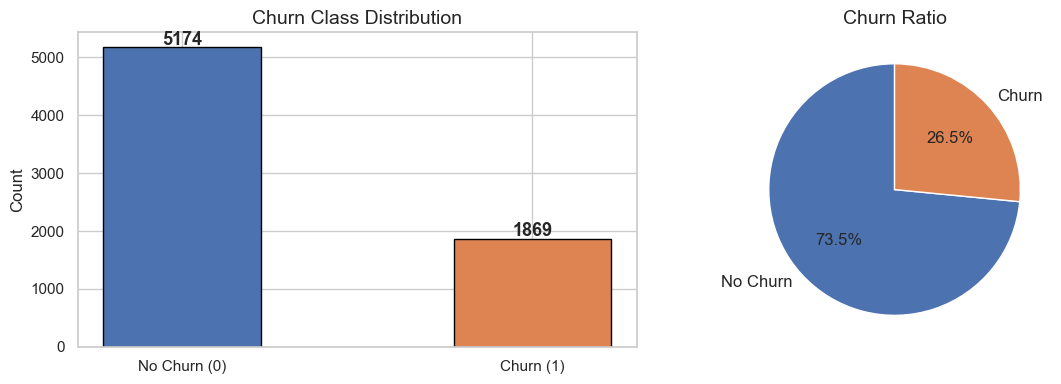

Churn rate: 26.54 %  →  moderately imbalanced dataset


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# --- bar chart ---
counts = df['Churn'].value_counts().sort_index()
axes[0].bar(['No Churn (0)', 'Churn (1)'], counts.values,
            color=['#4C72B0', '#DD8452'], edgecolor='black', width=0.45)
for i, v in enumerate(counts.values):
    axes[0].text(i, v + 40, str(v), ha='center', fontweight='bold', fontsize=13)
axes[0].set_ylabel('Count')
axes[0].set_title('Churn Class Distribution')

# --- pie chart ---
axes[1].pie(counts.values, labels=['No Churn', 'Churn'],
            autopct='%1.1f%%', colors=['#4C72B0', '#DD8452'],
            startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Churn Ratio')

plt.tight_layout()
plt.show()

print(f'Churn rate: {df["Churn"].mean()*100:.2f} %  →  moderately imbalanced dataset')

---
## 5. Numerical Features — Distributions & Churn Split

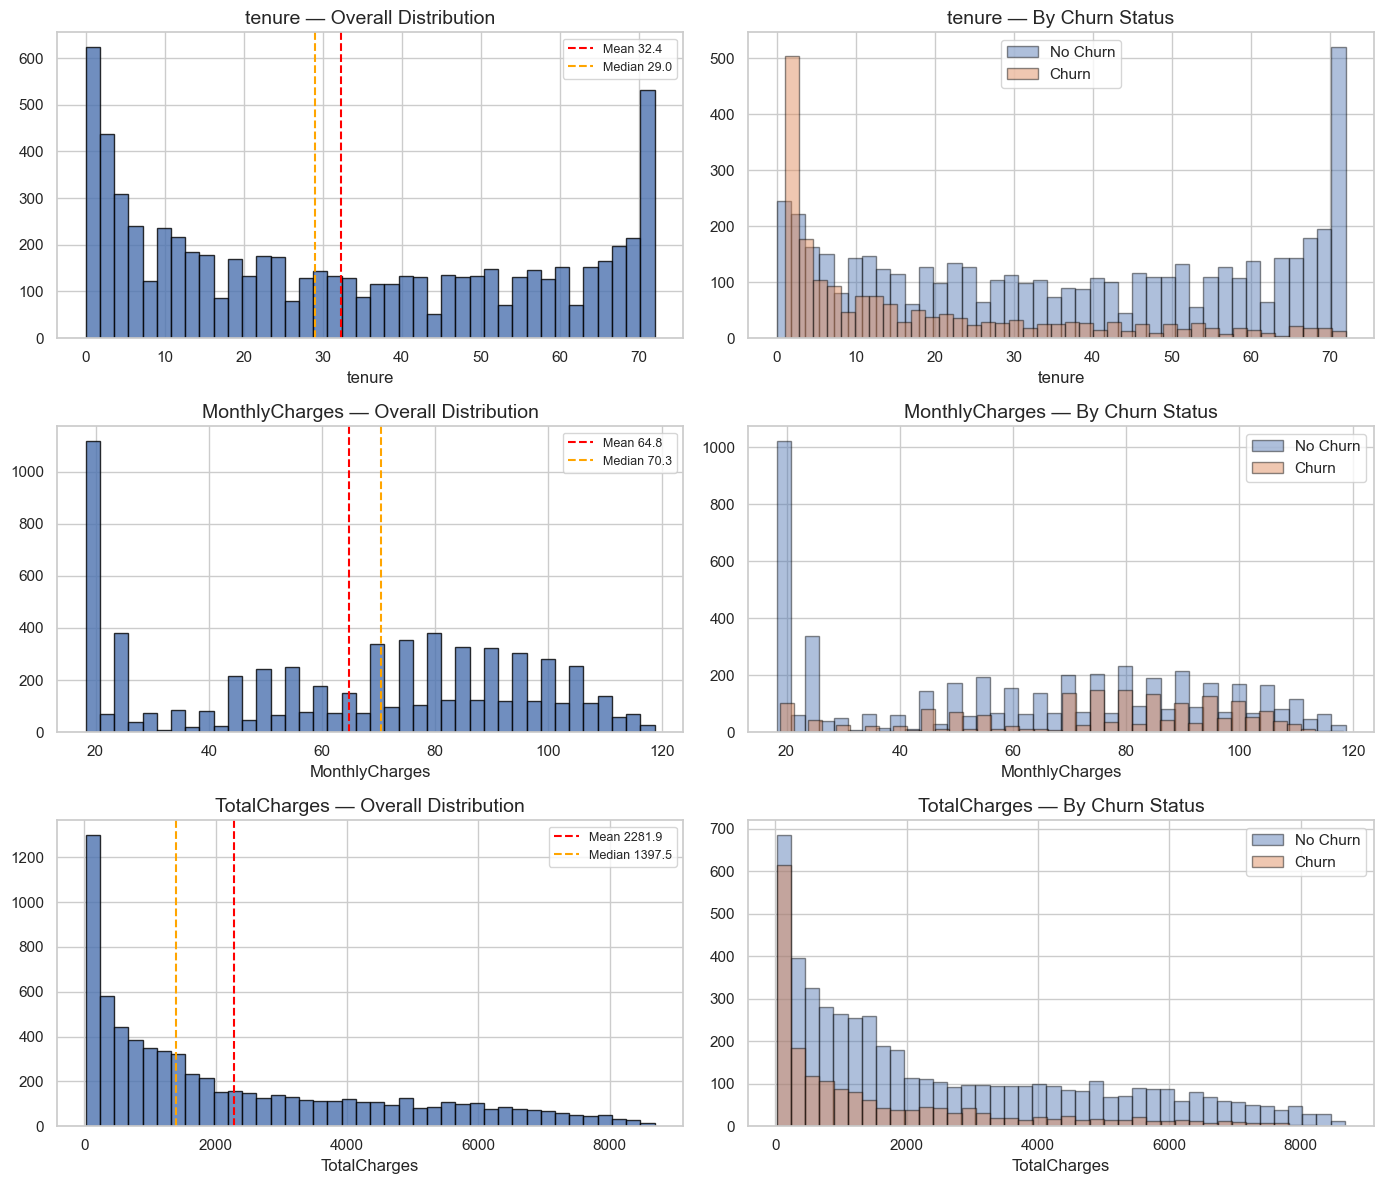

In [7]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(len(num_cols), 2, figsize=(14, 4 * len(num_cols)))

for i, col in enumerate(num_cols):
    # --- histogram (overall) ---
    axes[i, 0].hist(df[col], bins=40, color='#4C72B0', edgecolor='black', alpha=0.8)
    axes[i, 0].axvline(df[col].mean(), color='red', ls='--', lw=1.5, label=f'Mean {df[col].mean():.1f}')
    axes[i, 0].axvline(df[col].median(), color='orange', ls='--', lw=1.5, label=f'Median {df[col].median():.1f}')
    axes[i, 0].legend(fontsize=9)
    axes[i, 0].set_title(f'{col} — Overall Distribution')
    axes[i, 0].set_xlabel(col)

    # --- KDE by churn ---
    for label, color in [(0, '#4C72B0'), (1, '#DD8452')]:
        subset = df.loc[df['Churn'] == label, col]
        axes[i, 1].hist(subset, bins=40, alpha=0.45, color=color,
                        label='No Churn' if label == 0 else 'Churn', edgecolor='black')
    axes[i, 1].legend()
    axes[i, 1].set_title(f'{col} — By Churn Status')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

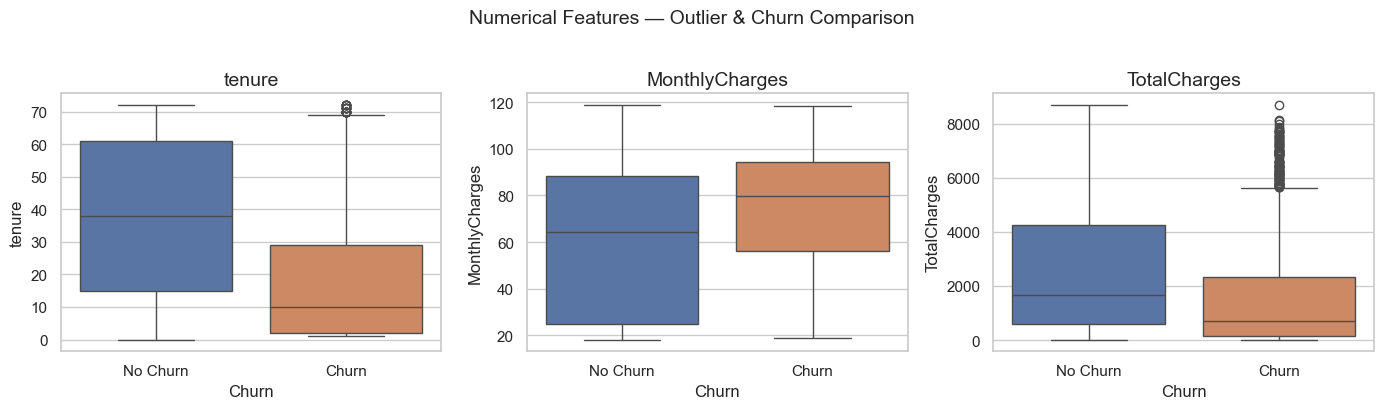

In [9]:
# Box-plots for outlier inspection
fig, axes = plt.subplots(1, len(num_cols), figsize=(14, 4))
for i, col in enumerate(num_cols):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i],
                palette=['#4C72B0', '#DD8452'])
    axes[i].set_xticklabels(['No Churn', 'Churn'])
    axes[i].set_title(f'{col}')
plt.suptitle('Numerical Features — Outlier & Churn Comparison', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

---
## 6. Categorical Features — Churn Rate Analysis

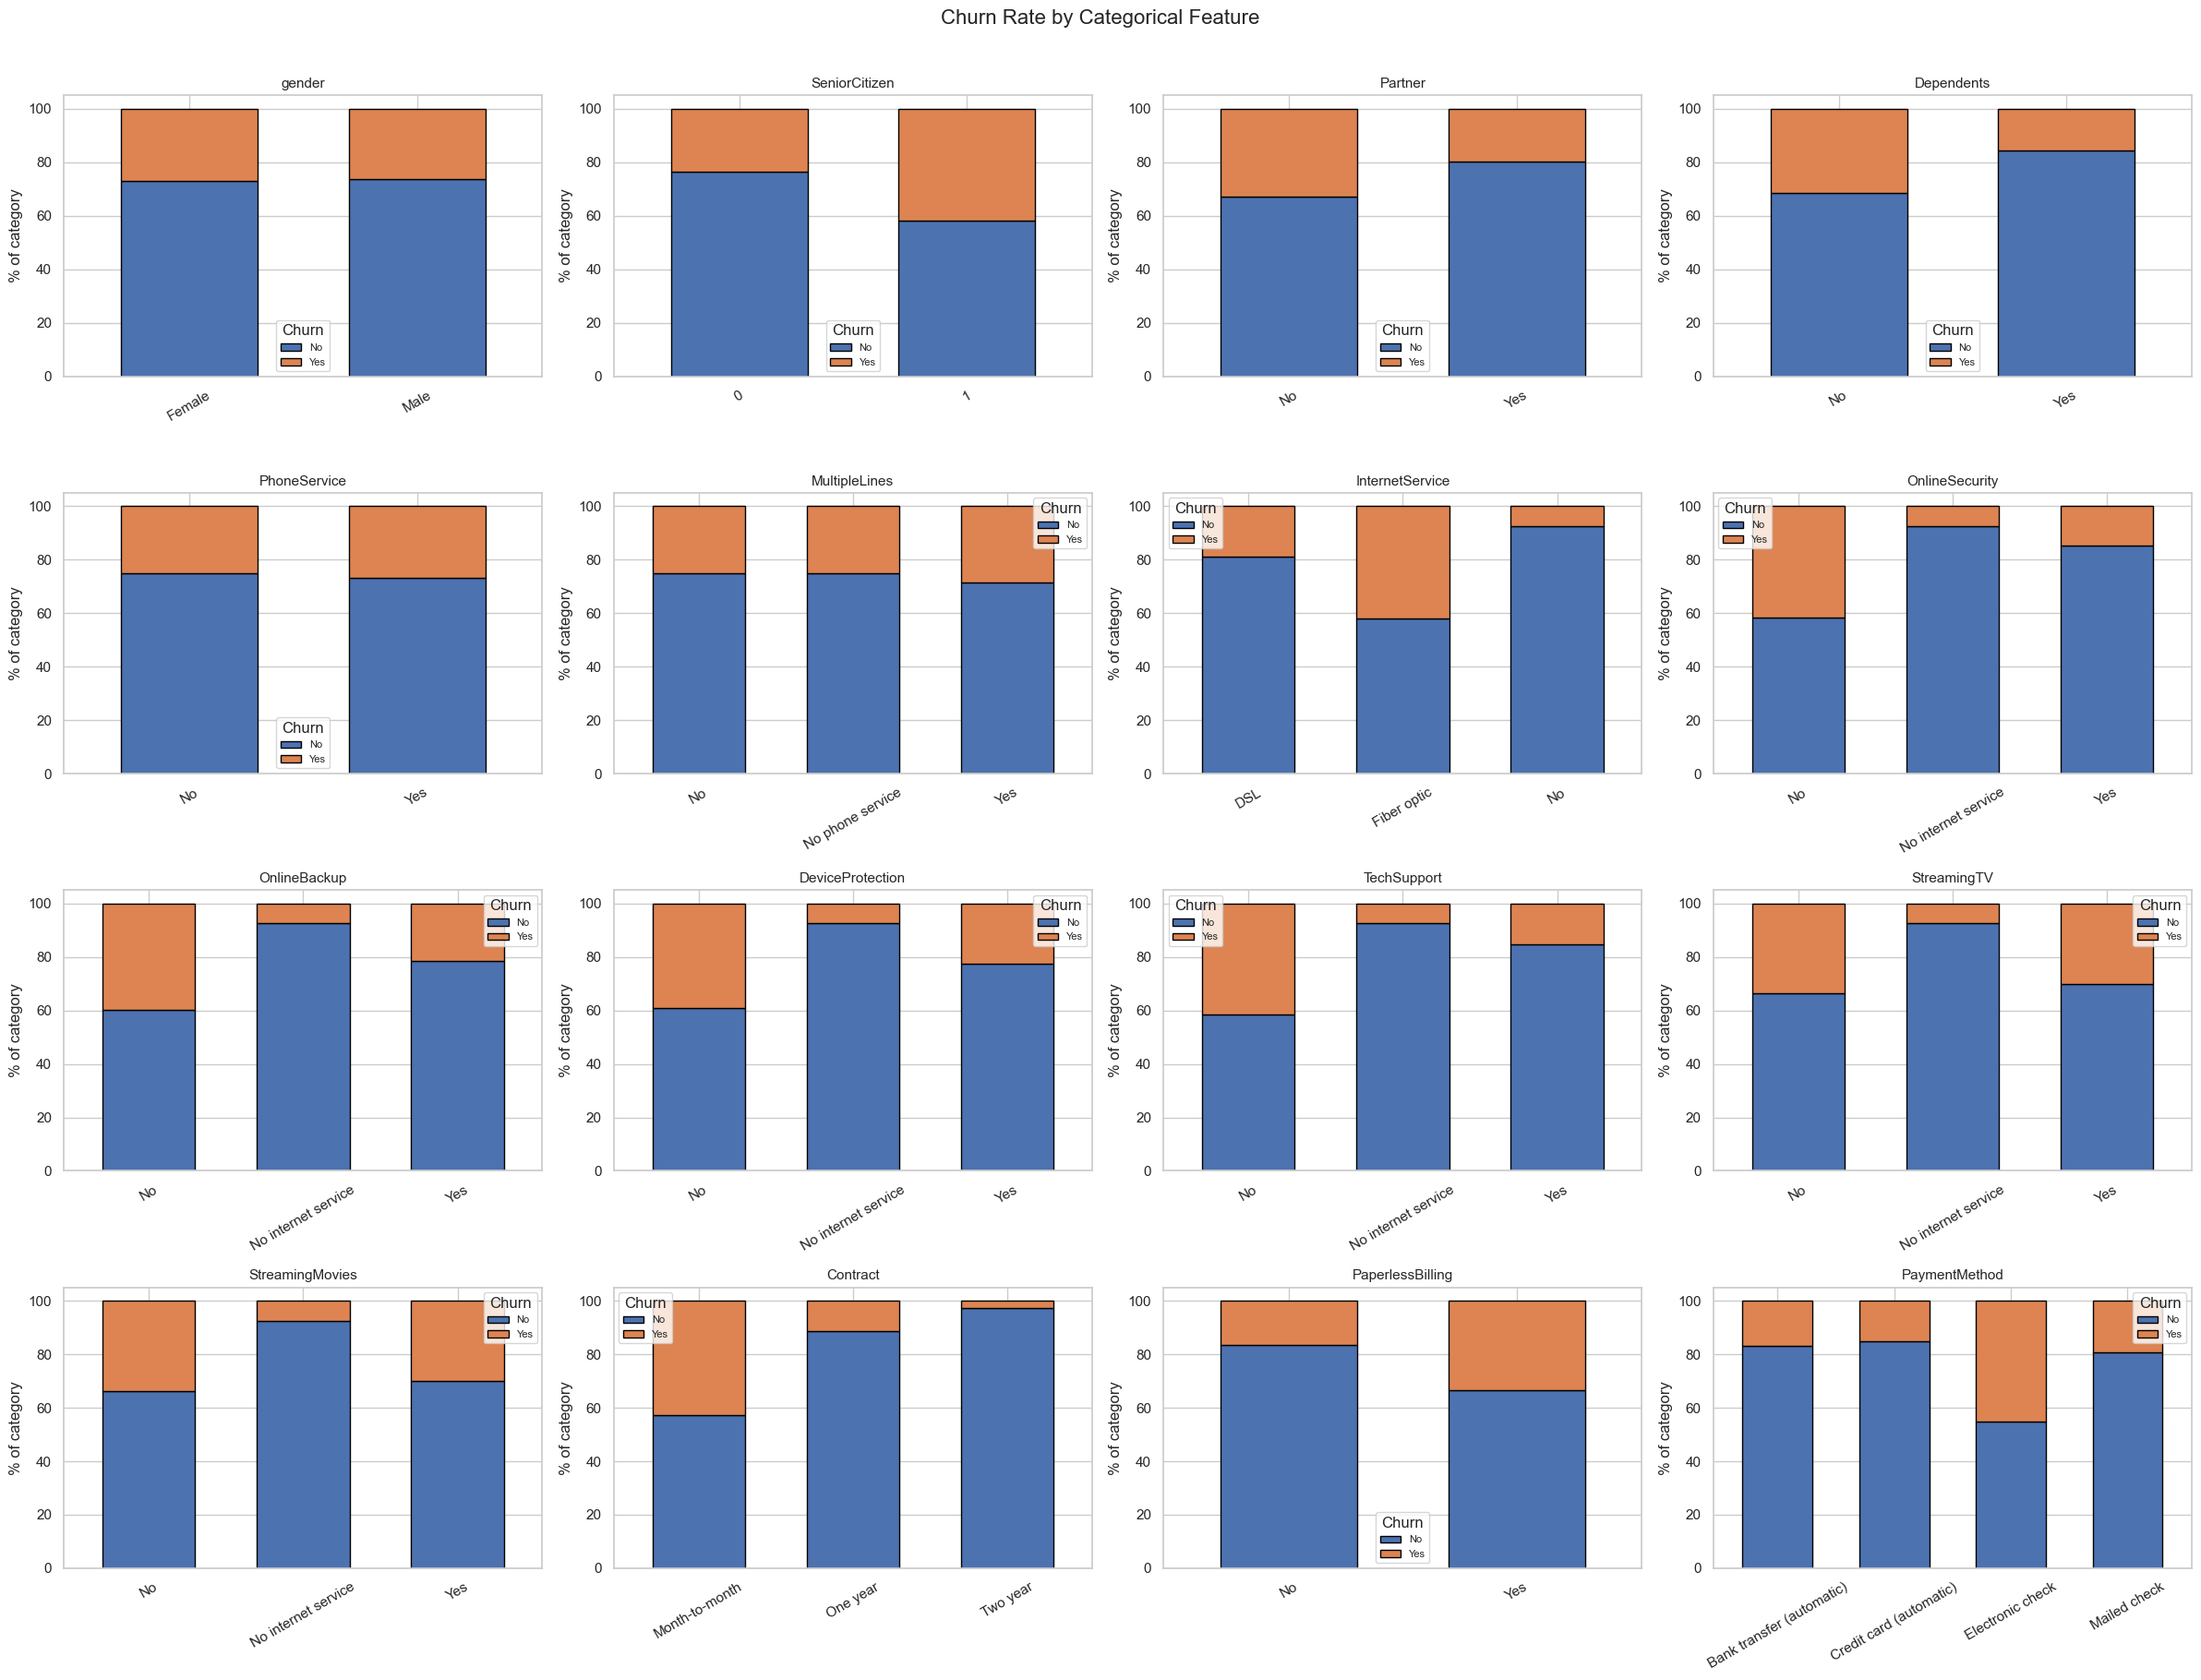

In [10]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']

# Number of sub-plots  →  arrange in a 4-col grid
n_cols_grid = 4
n_rows_grid = int(np.ceil(len(cat_cols) / n_cols_grid))

fig, axes = plt.subplots(n_rows_grid, n_cols_grid,
                         figsize=(6 * n_cols_grid, 4.5 * n_rows_grid))
axes = axes.flatten()

for idx, col in enumerate(cat_cols):
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, ax=axes[idx],
            color=['#4C72B0', '#DD8452'], edgecolor='black', width=0.6)
    axes[idx].set_title(col, fontsize=11)
    axes[idx].set_ylabel('% of category')
    axes[idx].set_xlabel('')
    axes[idx].tick_params(axis='x', rotation=30)
    axes[idx].legend(title='Churn', labels=['No', 'Yes'], fontsize=8)

# Hide unused axes
for idx in range(len(cat_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Churn Rate by Categorical Feature', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

---
## 7. Churn-Rate Summary Table  (sorted)

In [11]:
# Compute churn-rate per category for every categorical feature
rows = []
for col in cat_cols:
    grp = df.groupby(col)['Churn'].mean() * 100
    for cat, rate in grp.items():
        rows.append({'Feature': col, 'Category': str(cat), 'Churn Rate (%)': round(rate, 2)})

churn_summary = (pd.DataFrame(rows)
                 .sort_values('Churn Rate (%)', ascending=False)
                 .reset_index(drop=True))
churn_summary

,Feature,Category,Churn Rate (%)
0,PaymentMethod,Electronic check,45.29
1,Contract,Month-to-month,42.71
2,InternetService,Fiber optic,41.89
3,OnlineSecurity,No,41.77
4,SeniorCitizen,1,41.68
5,TechSupport,No,41.64
6,OnlineBackup,No,39.93
7,DeviceProtection,No,39.13
8,StreamingMovies,No,33.68
9,PaperlessBilling,Yes,33.57


---
## 8. Correlation Heatmap  (all features encoded)

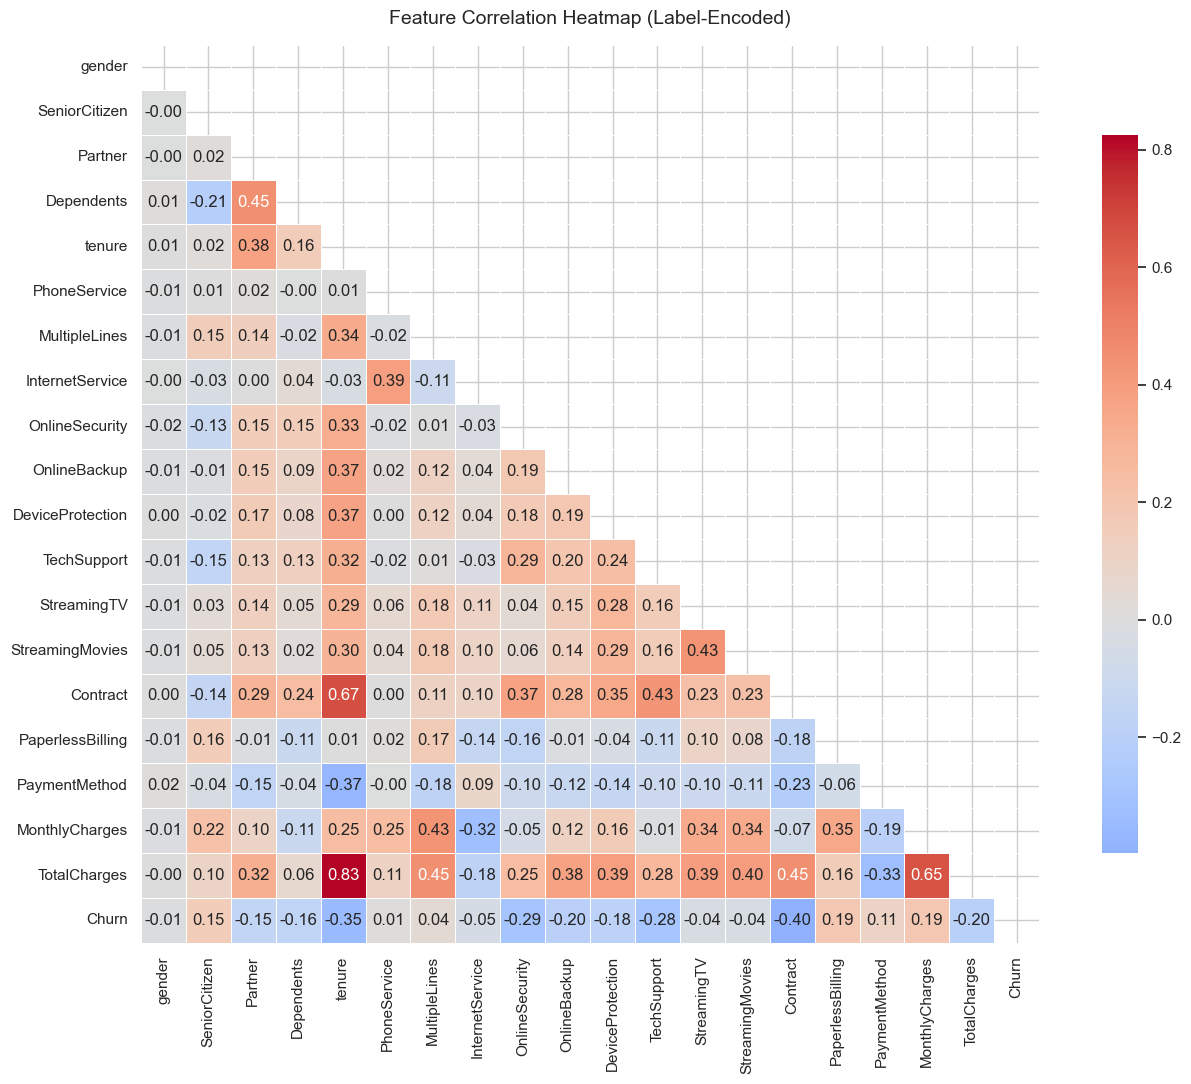

In [12]:
# Label-encode categorical columns on a copy  –  original df untouched
df_enc = df.copy()
le = LabelEncoder()
for col in df_enc.select_dtypes(include='object').columns:
    df_enc[col] = le.fit_transform(df_enc[col])

corr = df_enc.corr()

fig, ax = plt.subplots(figsize=(14, 11))
mask = np.triu(np.ones_like(corr, dtype=bool))          # upper triangle
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, linewidths=0.5, square=True,
            cbar_kws={'shrink': 0.8}, ax=ax)
ax.set_title('Feature Correlation Heatmap (Label-Encoded)', pad=15)
plt.tight_layout()
plt.show()

---
## 9. Top Features Correlated with Churn

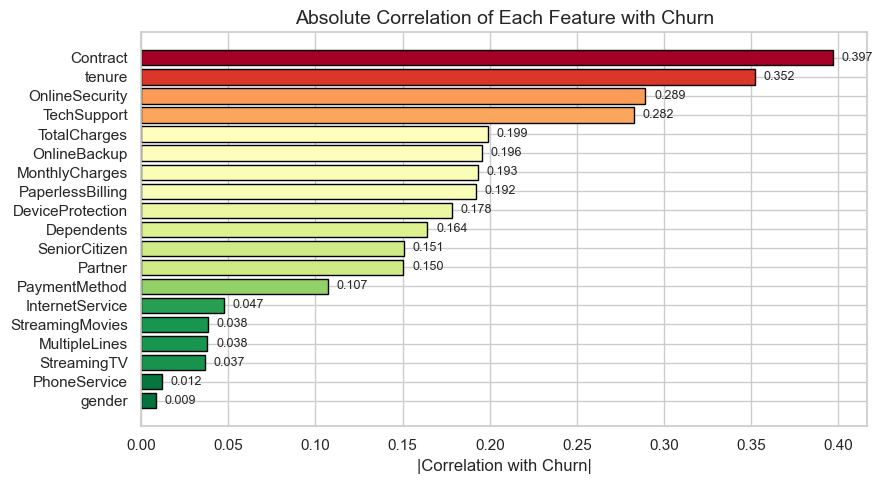

In [13]:
churn_corr = corr['Churn'].drop('Churn').abs().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(9, 5))
bars = ax.barh(churn_corr.index, churn_corr.values,
               color=plt.cm.RdYlGn_r(churn_corr.values / churn_corr.max()),
               edgecolor='black')
ax.set_xlabel('|Correlation with Churn|')
ax.set_title('Absolute Correlation of Each Feature with Churn')
ax.invert_yaxis()
for bar, val in zip(bars, churn_corr.values):
    ax.text(val + 0.005, bar.get_y() + bar.get_height()/2,
            f'{val:.3f}', va='center', fontsize=9)
plt.tight_layout()
plt.show()

---
## 10. Pairplot — Key Numerical Features coloured by Churn

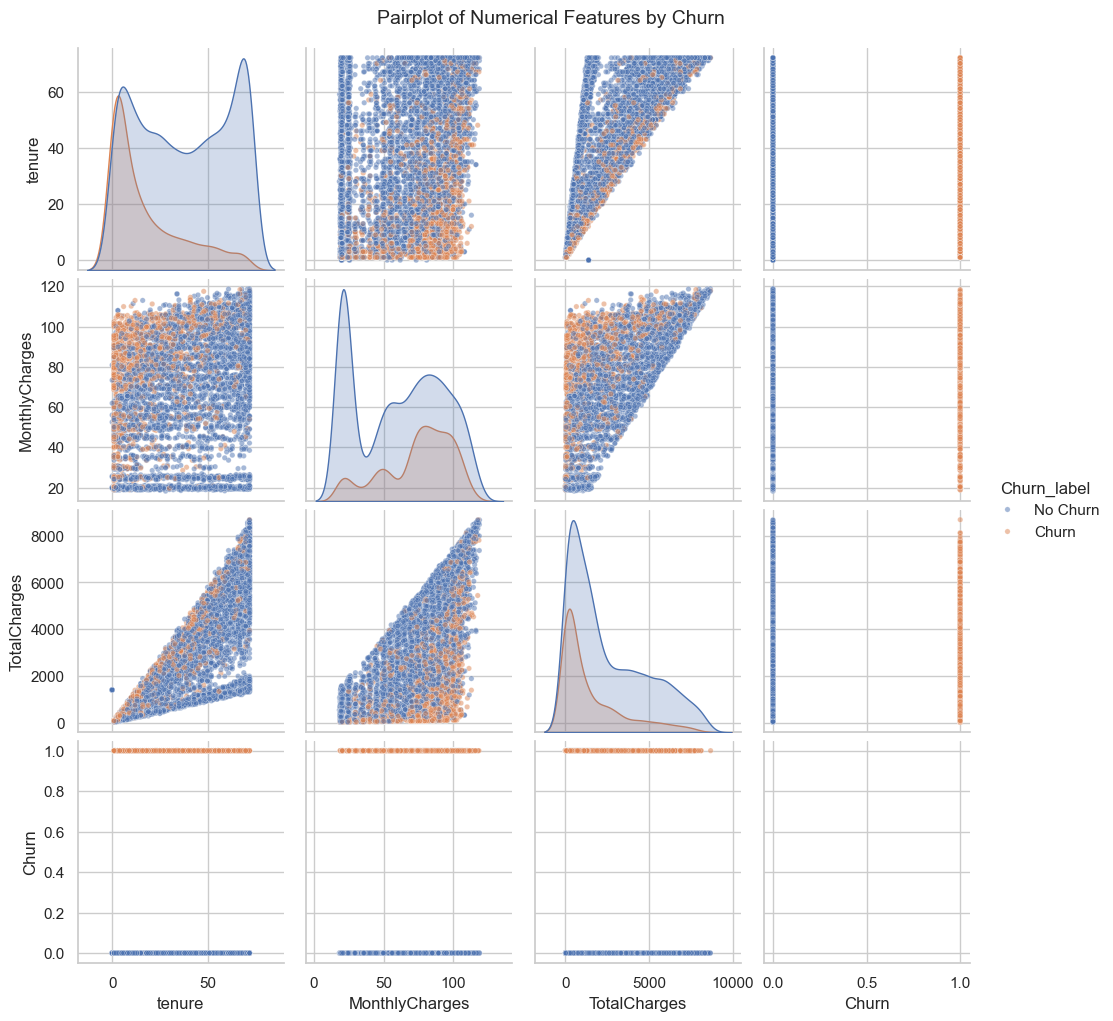

In [14]:
pair_df = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy()
pair_df['Churn_label'] = pair_df['Churn'].map({0: 'No Churn', 1: 'Churn'})

g = sns.pairplot(pair_df, hue='Churn_label', diag_kind='kde',
                 palette={'No Churn': '#4C72B0', 'Churn': '#DD8452'},
                 plot_kws={'alpha': 0.5, 's': 15})
g.fig.suptitle('Pairplot of Numerical Features by Churn', y=1.02, fontsize=14)
plt.show()

---
## 11. Key EDA Findings

| # | Observation |
|---|-------------|
| 1 | **Class imbalance** – ~26.9 % of customers churned; models should use stratified splits and consider class-weight or SMOTE. |
| 2 | **Tenure** – Churners cluster heavily in the first ~20 months. Long-tenure customers rarely churn. |
| 3 | **MonthlyCharges** – Higher charges correlate with churn; the churner distribution is right-shifted. |
| 4 | **TotalCharges** – Low values (new customers) dominate the churn group; 11 blank entries were median-imputed. |
| 5 | **Contract type** – Month-to-month contracts have the highest churn rate (~42 %). Two-year contracts churn < 5 %. |
| 6 | **Internet & add-ons** – Fiber-optic subscribers and those without Online Security / Tech Support churn more. |
| 7 | **Payment** – Electronic-check users churn most; automatic methods (bank transfer, credit card) are more stable. |
| 8 | **Gender / PhoneService** – Nearly neutral w.r.t. churn, low predictive signal. |
| 9 | **Strongest correlations with Churn** – Contract, tenure, OnlineSecurity, TechSupport, InternetService (after encoding). |
| 10 | **TotalCharges vs tenure** – Very high positive correlation (~0.83); potential multicollinearity to watch during modelling. |

In [2]:
# Cell: Import Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score, 
    precision_score, 
    recall_score, 
    f1_score,
    matthews_corrcoef,
    confusion_matrix,
    classification_report
)

import joblib
import os

In [5]:
# Cell: Data Preprocessing for Modeling
print("="*70)
print("DATA PREPROCESSING FOR MODELING")
print("="*70)

# Create a copy of the dataframe
df_model = df.copy()

# Drop customerID if it exists (not useful for prediction)
if 'customerID' in df_model.columns:
    df_model = df_model.drop('customerID', axis=1)
    print(" Dropped 'customerID' column")

# Handle TotalCharges - convert to numeric if it's object type
if 'TotalCharges' in df_model.columns:
    if df_model['TotalCharges'].dtype == 'object':
        df_model['TotalCharges'] = pd.to_numeric(df_model['TotalCharges'], errors='coerce')
        print("Converted 'TotalCharges' to numeric")
    
    # Fill NaN values with median
    if df_model['TotalCharges'].isnull().sum() > 0:
        df_model['TotalCharges'].fillna(df_model['TotalCharges'].median(), inplace=True)
        print(f" Filled {df_model['TotalCharges'].isnull().sum()} missing values in TotalCharges")

# Identify target column (adjust if your column name is different)
target_column = 'Churn'

# Encode target variable if it's categorical (Yes/No -> 1/0)
if df_model[target_column].dtype == 'object':
    df_model[target_column] = df_model[target_column].map({'Yes': 1, 'No': 0})
    print(f" Encoded target variable '{target_column}' (Yes=1, No=0)")

# Separate features and target
X = df_model.drop(target_column, axis=1)
y = df_model[target_column]

# Get categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f"\n Categorical columns to encode: {categorical_cols}")

# One-hot encode categorical variables
if len(categorical_cols) > 0:
    X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    print(f" One-hot encoding completed. New shape: {X_encoded.shape}")
else:
    X_encoded = X

print(f"\n Final feature matrix shape: {X_encoded.shape}")
print(f" Target variable shape: {y.shape}")
print(f"\n Target distribution:")
print(y.value_counts())
print(f"\n{y.value_counts(normalize=True) * 100}")

DATA PREPROCESSING FOR MODELING
 Dropped 'customerID' column
Converted 'TotalCharges' to numeric
 Filled 0 missing values in TotalCharges
 Encoded target variable 'Churn' (Yes=1, No=0)

 Categorical columns to encode: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
 One-hot encoding completed. New shape: (7043, 30)

 Final feature matrix shape: (7043, 30)
 Target variable shape: (7043,)

 Target distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [6]:
# Cell: Train-Test Split and Feature Scaling
print("="*70)
print("TRAIN-TEST SPLIT")
print("="*70)

# Split data (80-20 split with stratification)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f" Training set: {X_train.shape[0]} samples ({(X_train.shape[0]/len(X_encoded))*100:.1f}%)")
print(f" Test set: {X_test.shape[0]} samples ({(X_test.shape[0]/len(X_encoded))*100:.1f}%)")

print(f"\n Training set class distribution:")
print(y_train.value_counts())
print(f"\n Test set class distribution:")
print(y_test.value_counts())

# Feature Scaling (required for Logistic Regression and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n Feature scaling completed using StandardScaler")
print(f" Scaled training shape: {X_train_scaled.shape}")
print(f" Scaled test shape: {X_test_scaled.shape}")

TRAIN-TEST SPLIT
 Training set: 5634 samples (80.0%)
 Test set: 1409 samples (20.0%)

 Training set class distribution:
Churn
0    4139
1    1495
Name: count, dtype: int64

 Test set class distribution:
Churn
0    1035
1     374
Name: count, dtype: int64

 Feature scaling completed using StandardScaler
 Scaled training shape: (5634, 30)
 Scaled test shape: (1409, 30)


In [7]:
# Cell: Define Model Evaluation Function
def evaluate_model(model, X_test, y_test, model_name, use_scaled=False):
    """
    Comprehensive model evaluation function
    Returns dictionary of all metrics
    """
    # Predictions
    y_pred = model.predict(X_test)
    
    # Prediction probabilities for AUC
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = y_pred
    
    # Calculate all required metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Print results
    print("="*70)
    print(f"{model_name.upper()} - EVALUATION RESULTS")
    print("="*70)
    print(f"{'Metric':<20} {'Score':<10}")
    print("-"*70)
    print(f"{'Accuracy':<20} {accuracy:.4f}")
    print(f"{'AUC Score':<20} {auc:.4f}")
    print(f"{'Precision':<20} {precision:.4f}")
    print(f"{'Recall':<20} {recall:.4f}")
    print(f"{'F1 Score':<20} {f1:.4f}")
    print(f"{'MCC Score':<20} {mcc:.4f}")
    print("="*70)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    
    # Visualize Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Churn', 'Churn'],
                yticklabels=['No Churn', 'Churn'])
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))
    
    # Return metrics dictionary
    return {
        'Model': model_name,
        'Accuracy': round(accuracy, 4),
        'AUC': round(auc, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1': round(f1, 4),
        'MCC': round(mcc, 4)
    }

print(" Evaluation function defined successfully!")

 Evaluation function defined successfully!


In [10]:
# Cell: Create models directory if it doesn't exist
import os

if not os.path.exists('models'):
    os.makedirs('models')
    print(" Created 'models' directory")
else:
    print(" 'models' directory already exists")

 'models' directory already exists



MODEL 1: LOGISTIC REGRESSION
 Logistic Regression model trained successfully
 Number of iterations: 34
LOGISTIC REGRESSION - EVALUATION RESULTS
Metric               Score     
----------------------------------------------------------------------
Accuracy             0.8070
AUC Score            0.8416
Precision            0.6584
Recall               0.5668
F1 Score             0.6092
MCC Score            0.4843

Confusion Matrix:
[[925 110]
 [162 212]]


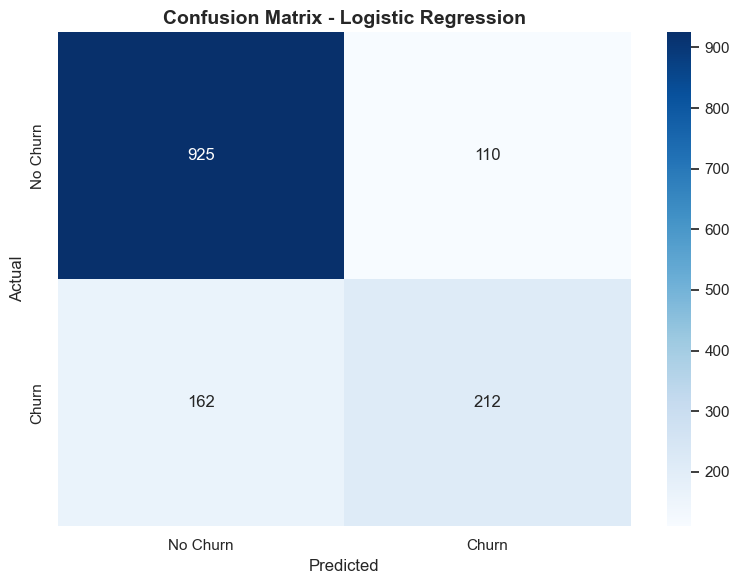


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1035
       Churn       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


 Model saved to 'models/logistic_regression.pkl'
 Scaler saved to 'models/scaler.pkl'


In [11]:
# Cell: Model 1 - Logistic Regression
print("\n" + "="*70)
print("MODEL 1: LOGISTIC REGRESSION")
print("="*70)

# Initialize and train
lr_model = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')
lr_model.fit(X_train_scaled, y_train)

print(" Logistic Regression model trained successfully")
print(f" Number of iterations: {lr_model.n_iter_[0]}")

# Evaluate
lr_results = evaluate_model(lr_model, X_test_scaled, y_test, "Logistic Regression", use_scaled=True)

# Save model
joblib.dump(lr_model, 'models/logistic_regression.pkl')
print("\n Model saved to 'models/logistic_regression.pkl'")

# Also save the scaler (needed for deployment)
joblib.dump(scaler, 'models/scaler.pkl')
print(" Scaler saved to 'models/scaler.pkl'")


MODEL 2: DECISION TREE CLASSIFIER
 Decision Tree model trained successfully
 Tree depth: 10
 Number of leaves: 242
DECISION TREE - EVALUATION RESULTS
Metric               Score     
----------------------------------------------------------------------
Accuracy             0.7750
AUC Score            0.7917
Precision            0.5953
Recall               0.4759
F1 Score             0.5290
MCC Score            0.3877

Confusion Matrix:
[[914 121]
 [196 178]]


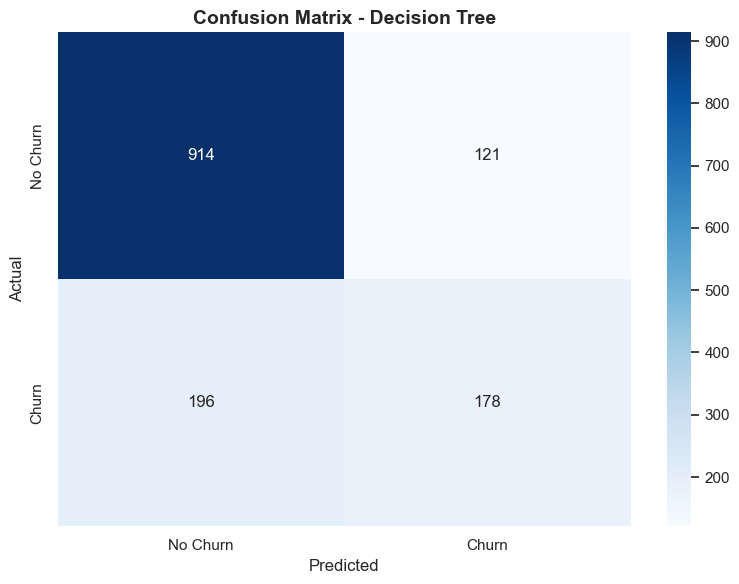


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      0.88      0.85      1035
       Churn       0.60      0.48      0.53       374

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409


 Model saved to 'models/decision_tree.pkl'

TOP 10 MOST IMPORTANT FEATURES
                       Feature  Importance
                        tenure    0.308742
   InternetService_Fiber optic    0.248424
                  TotalCharges    0.120451
                MonthlyCharges    0.097009
PaymentMethod_Electronic check    0.026171
             Contract_Two year    0.018871
            OnlineSecurity_Yes    0.018602
             MultipleLines_Yes    0.016759
             Contract_One year    0.016719
          PaperlessBilling_Yes    0.016124


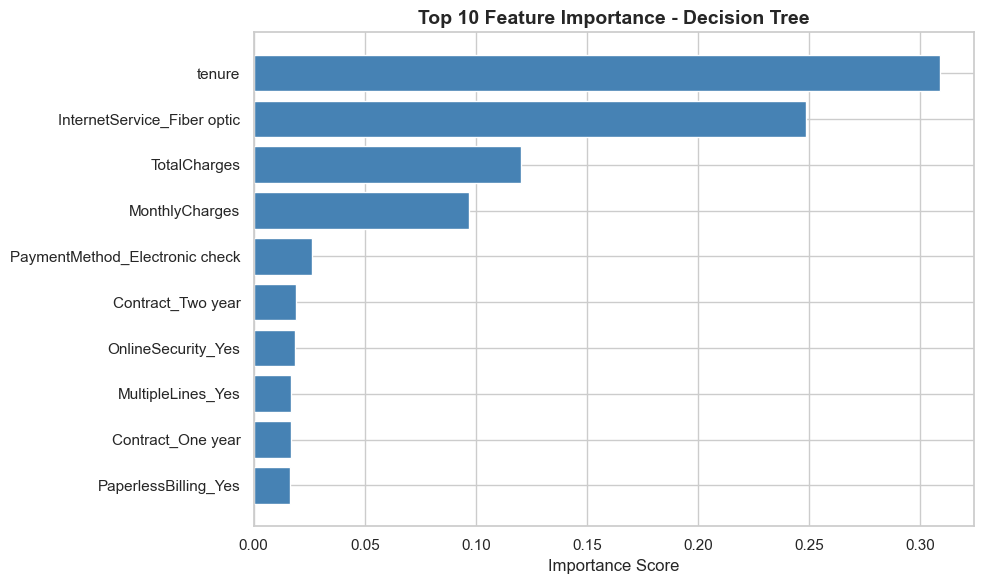

In [12]:
# Cell: Model 2 - Decision Tree Classifier
print("\n" + "="*70)
print("MODEL 2: DECISION TREE CLASSIFIER")
print("="*70)

# Initialize and train (Decision Tree doesn't need scaled data)
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10
)
dt_model.fit(X_train, y_train)

print(" Decision Tree model trained successfully")
print(f" Tree depth: {dt_model.get_depth()}")
print(f" Number of leaves: {dt_model.get_n_leaves()}")

# Evaluate
dt_results = evaluate_model(dt_model, X_test, y_test, "Decision Tree")

# Save model
joblib.dump(dt_model, 'models/decision_tree.pkl')
print("\n Model saved to 'models/decision_tree.pkl'")

# Feature Importance
print("\n" + "="*70)
print("TOP 10 MOST IMPORTANT FEATURES")
print("="*70)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

print(feature_importance.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 10 Feature Importance - Decision Tree', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


MODEL 3: K-NEAREST NEIGHBORS (KNN)
 KNN model trained successfully with k=5
K-NEAREST NEIGHBORS - EVALUATION RESULTS
Metric               Score     
----------------------------------------------------------------------
Accuracy             0.7473
AUC Score            0.7718
Precision            0.5253
Recall               0.5000
F1 Score             0.5123
MCC Score            0.3422

Confusion Matrix:
[[866 169]
 [187 187]]


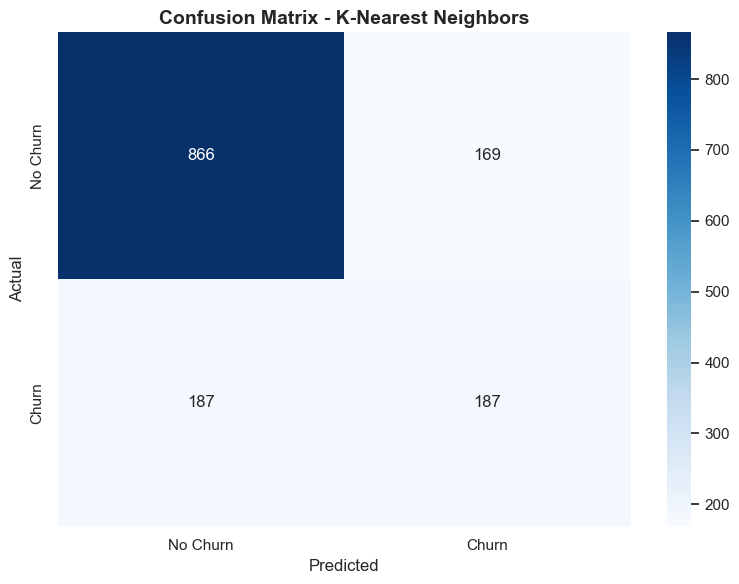


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.82      0.84      0.83      1035
       Churn       0.53      0.50      0.51       374

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.75      0.75      1409


 Model saved to 'models/knn.pkl'

FINDING OPTIMAL K VALUE


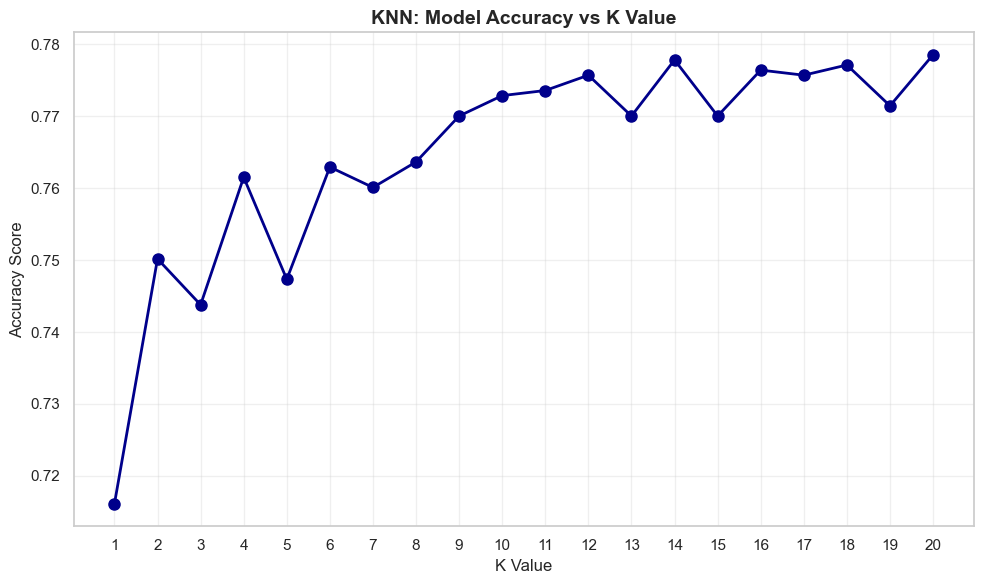


 Optimal K value: 20
 Best accuracy: 0.7786


In [13]:
# Cell: Model 3 - K-Nearest Neighbors (KNN)
print("\n" + "="*70)
print("MODEL 3: K-NEAREST NEIGHBORS (KNN)")
print("="*70)

# Initialize and train (KNN needs scaled data)
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train_scaled, y_train)

print(" KNN model trained successfully with k=5")

# Evaluate
knn_results = evaluate_model(knn_model, X_test_scaled, y_test, "K-Nearest Neighbors", use_scaled=True)

# Save model
joblib.dump(knn_model, 'models/knn.pkl')
print("\n Model saved to 'models/knn.pkl'")

# Find optimal K
print("\n" + "="*70)
print("FINDING OPTIMAL K VALUE")
print("="*70)

k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    score = knn_temp.score(X_test_scaled, y_test)
    k_scores.append(score)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o', linestyle='-', linewidth=2, markersize=8, color='darkblue')
plt.xlabel('K Value', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('KNN: Model Accuracy vs K Value', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

optimal_k = k_range[k_scores.index(max(k_scores))]
print(f"\n Optimal K value: {optimal_k}")
print(f" Best accuracy: {max(k_scores):.4f}")